In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from utils.draw import draw_squares
from utils.square import SquareDataset
from torch.utils.data import DataLoader
import utils.viz as torchviz

In [53]:
class LinearModel(nn.Module):
    def __init__(self, x, y):
        super(LinearModel, self).__init__()
        self.layer1 = nn.Linear(x, y)

    def forward(self, x):
        x = self.layer1(x)
        return x
        return self.size

In [43]:
squares = SquareDataset(256 * 100)
print(squares[34])
print(squares[254])
print(squares[25])

(tensor([164., 118., 146.,  42., 141.,  54.,  31., 148., 112.]), tensor([1., 0., 0.]))
(tensor([147.,  11., 130., 205., 138., 150., 123.,  48., 239.]), tensor([0., 1., 0.]))
(tensor([ 59., 192., 186., 204., 179., 115., 128., 115., 215.]), tensor([0., 1., 0.]))


# Using the not-so-smart Model

In [54]:
model = LinearModel(9, 3)
X = squares[4][0].reshape(-1, 9)/255
print(X)
print(model(X))

tensor([[0.2431, 0.8667, 0.8078, 0.1608, 0.7020, 0.2353, 0.1294, 0.1098, 0.0980]])
tensor([[-0.2643,  0.0988,  0.1394]], grad_fn=<AddmmBackward>)


In [55]:
model.layer1.weight, model.layer1.bias

(Parameter containing:
 tensor([[-0.2656,  0.0186, -0.0562,  0.2688, -0.1685,  0.2430,  0.0902, -0.0094,
           0.3029],
         [ 0.0936,  0.0219, -0.2919, -0.2648,  0.2511, -0.1174, -0.2411, -0.2280,
           0.1509],
         [-0.2547, -0.2889,  0.1525, -0.1716,  0.0122,  0.2645,  0.1471,  0.1528,
          -0.0288]], requires_grad=True),
 Parameter containing:
 tensor([-0.1929,  0.2283,  0.2524], requires_grad=True))

In [56]:
cost = torch.nn.MSELoss()
Y = squares[4][1].reshape(-1, 3)
loss = cost(model(X), Y)
print(loss)

tensor(0.5425, grad_fn=<MseLossBackward>)


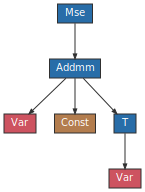

In [57]:
torchviz.draw(loss)

# Optimizing All Teh Things!

In [58]:
# Use the nn package to define our model and loss function.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LinearModel(9, 3)
model = model.to(device)

cost = torch.nn.MSELoss()

# optimizer which Tensors it should update.
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# dataset!
dataloader = DataLoader(squares, batch_size=128)

epochs = 20

In [59]:
for t in range(epochs):
    for batch, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device) / 255, Y.to(device)
        optimizer.zero_grad()
        pred = model(X)
        loss = cost(pred, Y)
        loss.backward()
        optimizer.step()

    print('l: {:>8f}, (e {:>3})'.format(loss.item(), t))

l: 0.258228, (e   0)
l: 0.224036, (e   1)
l: 0.197027, (e   2)
l: 0.175484, (e   3)
l: 0.158304, (e   4)
l: 0.144610, (e   5)
l: 0.133697, (e   6)
l: 0.125005, (e   7)
l: 0.118084, (e   8)
l: 0.112577, (e   9)
l: 0.108196, (e  10)
l: 0.104714, (e  11)
l: 0.101947, (e  12)
l: 0.099751, (e  13)
l: 0.098007, (e  14)
l: 0.096624, (e  15)
l: 0.095528, (e  16)
l: 0.094660, (e  17)
l: 0.093972, (e  18)
l: 0.093427, (e  19)


In [60]:
print("W's and b's:")
for p in model.parameters():
    print(p)

W's and b's:
Parameter containing:
tensor([[ 0.4643,  0.4846,  0.4815, -0.2514, -0.2653, -0.2521, -0.2748, -0.2840,
         -0.2361],
        [-0.2033, -0.2344, -0.2043,  0.5191,  0.4904,  0.5521, -0.2334, -0.2239,
         -0.2675],
        [-0.2022, -0.2441, -0.1986, -0.2378, -0.2270, -0.2227,  0.5370,  0.5147,
          0.5645]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.3958, 0.2348, 0.1931], device='cuda:0', requires_grad=True)


# Does it work? (Test)

In [ ]:
# TEST

# Saving the model

In [ ]:
# SAVE